In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import pickle as pickle
import os
import datetime as dt
import squarify as squarify
import base64
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re

In [2]:
df = pd.read_csv("data/segmentasicustomerwsh.csv")

In [3]:
print(df)

    id_transaksi id_customer tanggal_transaksi  jumlah_transaksi  \
0           T001     WSH001           1/7/2023                 7   
1           T002      WSH002          1/7/2023                13   
2           T003      WSH003          1/7/2023                21   
3           T004      WSH004          1/7/2023                 5   
4           T005      WSH002          1/7/2023                 6   
..           ...         ...               ...               ...   
585         T586      WSH002         8/11/2023                 8   
586         T587      WSH008         8/11/2023                 3   
587         T588      WSH018         8/11/2023                 9   
588         T589      WSH019         8/11/2023                 8   
589         T590      WSH010         9/11/2023                 6   

     total_transaksi                                   item_transaksi  
0              61500                               C(3); KK(2); SL(2)  
1             116500     BM(2); BT(1); 

In [4]:
df.head()

,id_transaksi,id_customer,tanggal_transaksi,jumlah_transaksi,total_transaksi,item_transaksi
0,T001,WSH001,1/7/2023,7,61500,C(3); KK(2); SL(2)
1,T002,WSH002,1/7/2023,13,116500,BM(2); BT(1); C(2); R(2); S(1); SB(2); SL(3)
2,T003,WSH003,1/7/2023,21,183000,BB(3); BH(3); BM(3); BT(3); KL(3); KU(3); MA(3)
3,T004,WSH004,1/7/2023,5,42500,C(5)
4,T005,WSH002,1/7/2023,6,50000,KK(2); KM(2); KU(2)


In [5]:
df = pd.DataFrame(df)

In [6]:
print(df)

    id_transaksi id_customer tanggal_transaksi  jumlah_transaksi  \
0           T001     WSH001           1/7/2023                 7   
1           T002      WSH002          1/7/2023                13   
2           T003      WSH003          1/7/2023                21   
3           T004      WSH004          1/7/2023                 5   
4           T005      WSH002          1/7/2023                 6   
..           ...         ...               ...               ...   
585         T586      WSH002         8/11/2023                 8   
586         T587      WSH008         8/11/2023                 3   
587         T588      WSH018         8/11/2023                 9   
588         T589      WSH019         8/11/2023                 8   
589         T590      WSH010         9/11/2023                 6   

     total_transaksi                                   item_transaksi  
0              61500                               C(3); KK(2); SL(2)  
1             116500     BM(2); BT(1); 

In [7]:
df['id_customer'] = df['id_customer'].str.strip().str.lower()

In [8]:
df.head()

,id_transaksi,id_customer,tanggal_transaksi,jumlah_transaksi,total_transaksi,item_transaksi
0,T001,wsh001,1/7/2023,7,61500,C(3); KK(2); SL(2)
1,T002,wsh002,1/7/2023,13,116500,BM(2); BT(1); C(2); R(2); S(1); SB(2); SL(3)
2,T003,wsh003,1/7/2023,21,183000,BB(3); BH(3); BM(3); BT(3); KL(3); KU(3); MA(3)
3,T004,wsh004,1/7/2023,5,42500,C(5)
4,T005,wsh002,1/7/2023,6,50000,KK(2); KM(2); KU(2)


In [9]:
print("Jumlah data yang memiliki missing null")
df.isnull().sum()
(df == 'NA').sum()

Jumlah data yang memiliki missing null


id_transaksi         0
id_customer          0
tanggal_transaksi    0
jumlah_transaksi     0
total_transaksi      0
item_transaksi       0
dtype: int64

In [10]:
print("Duplicate Data")
df.duplicated().sum()

Duplicate Data


0

In [11]:
#Menghapus nilai null
df.replace('NA', pd.NA, inplace=True)
df.dropna(inplace=True)

In [12]:
#menghapus duplicate row
df.drop_duplicates(inplace=True)

In [13]:
print(df)

    id_transaksi id_customer tanggal_transaksi  jumlah_transaksi  \
0           T001      wsh001          1/7/2023                 7   
1           T002      wsh002          1/7/2023                13   
2           T003      wsh003          1/7/2023                21   
3           T004      wsh004          1/7/2023                 5   
4           T005      wsh002          1/7/2023                 6   
..           ...         ...               ...               ...   
585         T586      wsh002         8/11/2023                 8   
586         T587      wsh008         8/11/2023                 3   
587         T588      wsh018         8/11/2023                 9   
588         T589      wsh019         8/11/2023                 8   
589         T590      wsh010         9/11/2023                 6   

     total_transaksi                                   item_transaksi  
0              61500                               C(3); KK(2); SL(2)  
1             116500     BM(2); BT(1); 

In [14]:
df['tanggal_transaksi'] = pd.to_datetime(df['tanggal_transaksi'], dayfirst=True)
df


,id_transaksi,id_customer,tanggal_transaksi,jumlah_transaksi,total_transaksi,item_transaksi
0,T001,wsh001,2023-07-01,7,61500,C(3); KK(2); SL(2)
1,T002,wsh002,2023-07-01,13,116500,BM(2); BT(1); C(2); R(2); S(1); SB(2); SL(3)
2,T003,wsh003,2023-07-01,21,183000,BB(3); BH(3); BM(3); BT(3); KL(3); KU(3); MA(3)
3,T004,wsh004,2023-07-01,5,42500,C(5)
4,T005,wsh002,2023-07-01,6,50000,KK(2); KM(2); KU(2)
...,...,...,...,...,...,...
585,T586,wsh002,2023-11-08,8,74500,BB(2); C(1); KU(2); O(1); S(1); T(1)
586,T587,wsh008,2023-11-08,3,22500,BT(2); KL(1)
587,T588,wsh018,2023-11-08,9,82000,DK(4); KM(1); MP(2); PP(1); T(1)
588,T589,wsh019,2023-11-08,8,66500,BB(1); BT(2); KK(2); O(1); SB(1); T(1)


In [15]:
data = df.sort_values(by='tanggal_transaksi', ascending=False)
data

,id_transaksi,id_customer,tanggal_transaksi,jumlah_transaksi,total_transaksi,item_transaksi
589,T590,wsh010,2023-11-09,6,54000,DK(2); KK(2); MA(1); P(1)
588,T589,wsh019,2023-11-08,8,66500,BB(1); BT(2); KK(2); O(1); SB(1); T(1)
587,T588,wsh018,2023-11-08,9,82000,DK(4); KM(1); MP(2); PP(1); T(1)
586,T587,wsh008,2023-11-08,3,22500,BT(2); KL(1)
585,T586,wsh002,2023-11-08,8,74500,BB(2); C(1); KU(2); O(1); S(1); T(1)
...,...,...,...,...,...,...
1,T002,wsh002,2023-07-01,13,116500,BM(2); BT(1); C(2); R(2); S(1); SB(2); SL(3)
5,T006,wsh010,2023-07-01,9,81000,P(3); PP(3); S(3);
6,T007,wsh005,2023-07-01,8,72000,MA(2); MP(2); O(2); PG(2)
7,T008,wsh006,2023-07-01,7,61500,BB(2); BH(2); BM(2); C(1)


In [16]:
data.nunique()

id_transaksi         590
id_customer           38
tanggal_transaksi    131
jumlah_transaksi      18
total_transaksi      150
item_transaksi       348
dtype: int64

In [17]:
print("Transactions timeframe from {} to {}".format(data['tanggal_transaksi'].min(), data['tanggal_transaksi'].max()))
    

Transactions timeframe from 2023-07-01 00:00:00 to 2023-11-09 00:00:00


In [18]:
recent_date = data['tanggal_transaksi'].max()
recent_date

Timestamp('2023-11-09 00:00:00')

In [19]:
Recency = data.groupby(['id_customer']).agg({'tanggal_transaksi': lambda x: (recent_date - x.max()).days}).rename(columns={'tanggal_transaksi':'Recency'})
Recency

,Recency
id_customer,
wsh001,4
wsh002,1
wsh003,5
wsh004,9
wsh005,15
wsh006,36
wsh007,5
wsh008,1
wsh009,5


In [20]:
Frequency = data.groupby(['id_customer']).agg({'id_transaksi': lambda x:len(x)}).rename(columns={'id_transaksi':'Frequency'})
Frequency

,Frequency
id_customer,
wsh001,32
wsh002,21
wsh003,18
wsh004,34
wsh005,20
wsh006,13
wsh007,21
wsh008,30
wsh009,23


In [21]:
Monetary = data.groupby(['id_customer']).agg({'total_transaksi': lambda x:x.sum()}).rename(columns={'total_transaksi':'Monetary'})
Monetary

,Monetary
id_customer,
wsh001,2101000
wsh002,1157000
wsh003,1227000
wsh004,1759000
wsh005,1274500
wsh006,740000
wsh007,1233500
wsh008,1778000
wsh009,1439000


In [22]:
RFM = pd.concat([Recency,Frequency,Monetary], axis=1)
RFM

,Recency,Frequency,Monetary
id_customer,,,
wsh001,4,32,2101000
wsh002,1,21,1157000
wsh003,5,18,1227000
wsh004,9,34,1759000
wsh005,15,20,1274500
wsh006,36,13,740000
wsh007,5,21,1233500
wsh008,1,30,1778000
wsh009,5,23,1439000


In [23]:
df_RFM = data.groupby('id_customer').agg({
            'tanggal_transaksi': lambda x: (recent_date - x.max()).days, # Recency
            'id_customer': 'count', # Frequency
            'total_transaksi': lambda x: (x.sum()) # Monetary
        }).rename(columns={'tanggal_transaksi': 'Recency', 'id_customer': 'Frequency', 'total_transaksi': 'Monetary'})
df_RFM      

,Recency,Frequency,Monetary
id_customer,,,
wsh001,4,32,2101000
wsh002,1,21,1157000
wsh003,5,18,1227000
wsh004,9,34,1759000
wsh005,15,20,1274500
wsh006,36,13,740000
wsh007,5,21,1233500
wsh008,1,30,1778000
wsh009,5,23,1439000


In [24]:
from sklearn.preprocessing import StandardScaler
df_RFM_normalized = df_RFM.copy()  # Create a copy to avoid modifying the original DataFrame
        
        # Initialize the MinMaxScaler
scaler = StandardScaler()

        # Normalize the 'Recency', 'Frequency', and 'Monetary' columns
df_RFM_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df_RFM[['Recency', 'Frequency', 'Monetary']])
df_RFM_normalized


,Recency,Frequency,Monetary
id_customer,,,
wsh001,-0.534444,1.928977,2.271838
wsh002,-0.894956,0.640938,0.487359
wsh003,-0.414273,0.289655,0.619683
wsh004,0.066410,2.163166,1.625342
wsh005,0.787435,0.523844,0.709474
wsh006,3.311021,-0.295818,-0.300912
wsh007,-0.414273,0.640938,0.631970
wsh008,-0.894956,1.694789,1.661259
wsh009,-0.414273,0.875127,1.020434


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_RFM_normalized)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(df_RFM_normalized, labels, metric = 'euclidean'))

silhouette_scores

plt.figure(figsize=(10,5))
sns.lineplot(
    x = range(2,21),
    y = silhouette_scores
)
sns.scatterplot(
    x=range(2,21),
    y=silhouette_scores
)
plt.xticks = range(2,21)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')

ValueError: All arrays must be of the same length

<Figure size 1000x500 with 0 Axes>

<AxesSubplot: title={'center': 'Metode Elbow'}, xlabel='Jumlah kluster (K)', ylabel='Jumlah kuadrat jarak'>

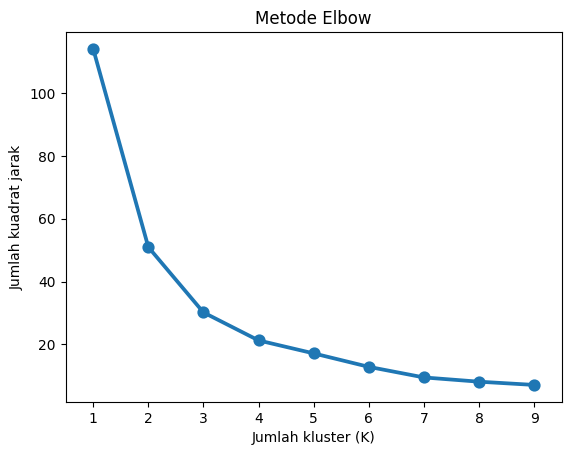

In [26]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(df_RFM_normalized)
    sse[k] = kmeans.inertia_
   
fig, ax = plt.subplots()
ax.set_title('Metode Elbow')
ax.set_xlabel('Jumlah kluster (K)')
ax.set_ylabel('Jumlah kuadrat jarak')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()), ax=ax)


For n_clusters=2, the average silhouette score is: 0.4771154449227562


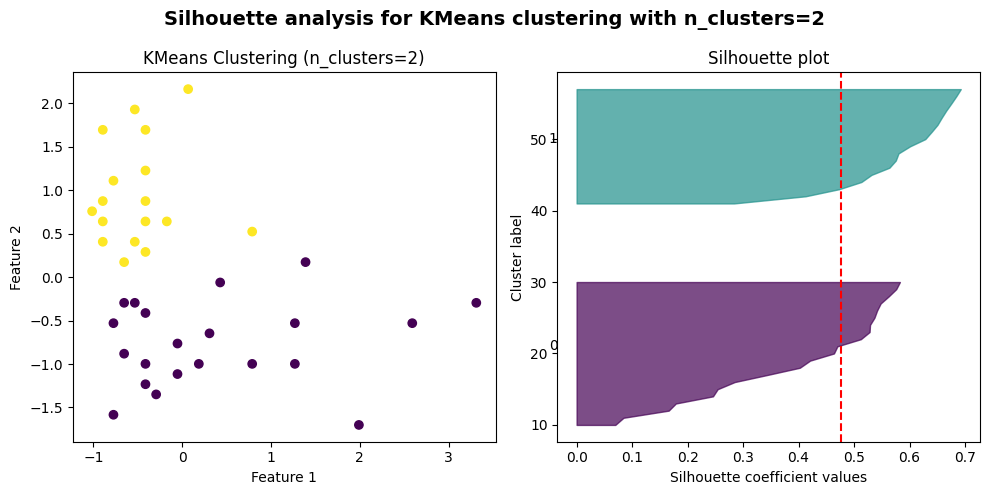

For n_clusters=3, the average silhouette score is: 0.48460049514121334


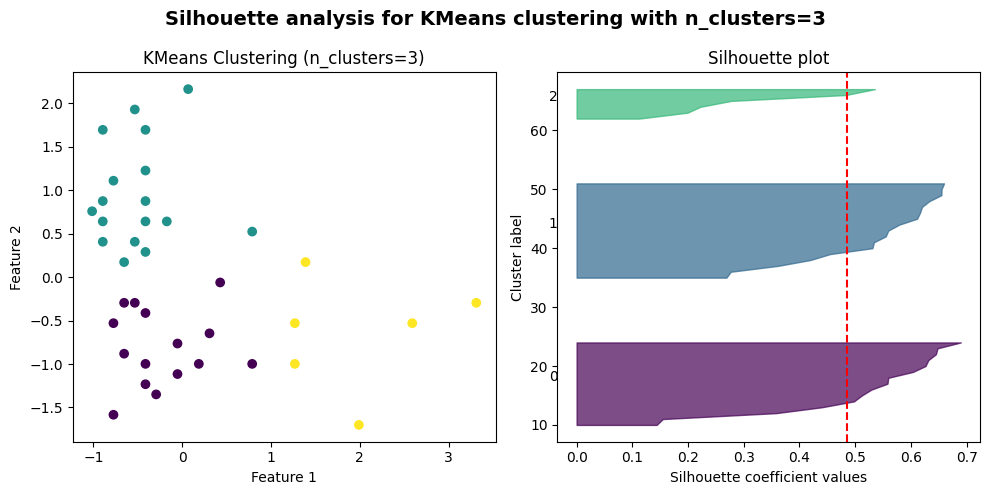

For n_clusters=4, the average silhouette score is: 0.45050982654031557


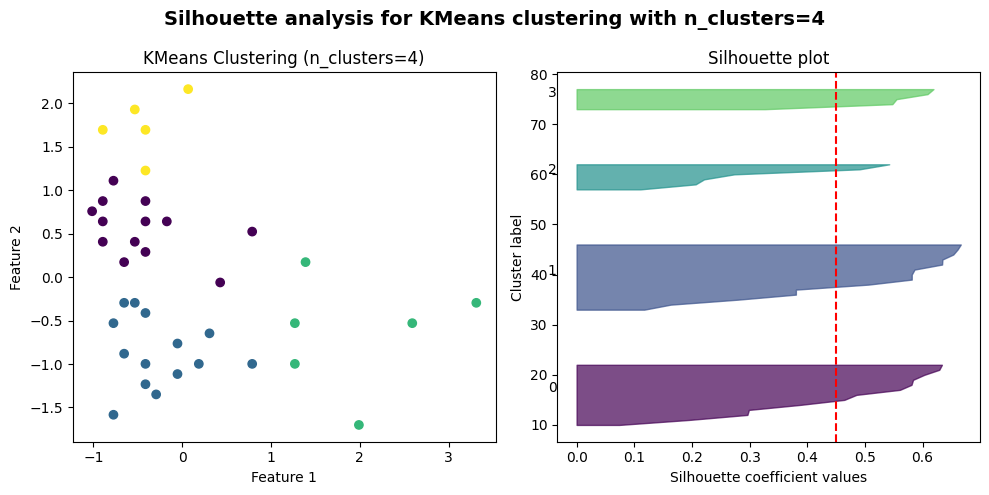

For n_clusters=5, the average silhouette score is: 0.4567388876045491


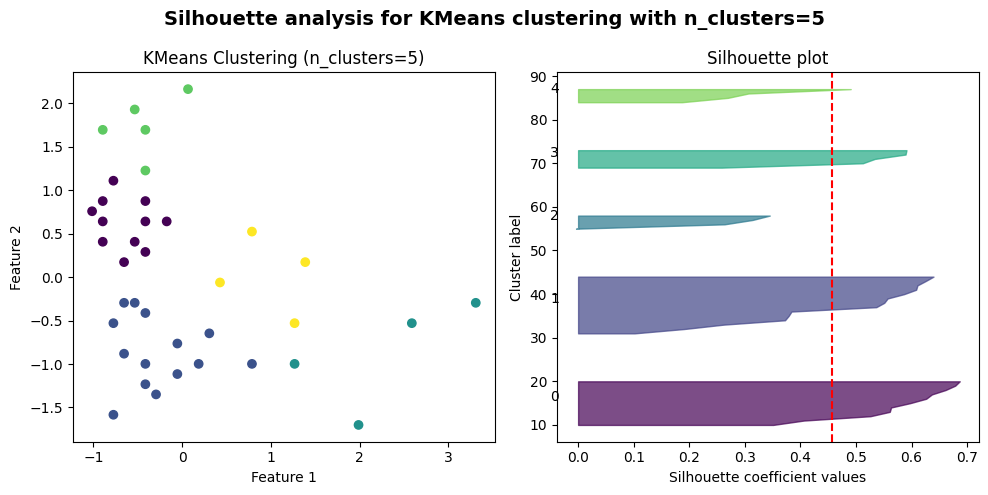

For n_clusters=6, the average silhouette score is: 0.4595425253806999


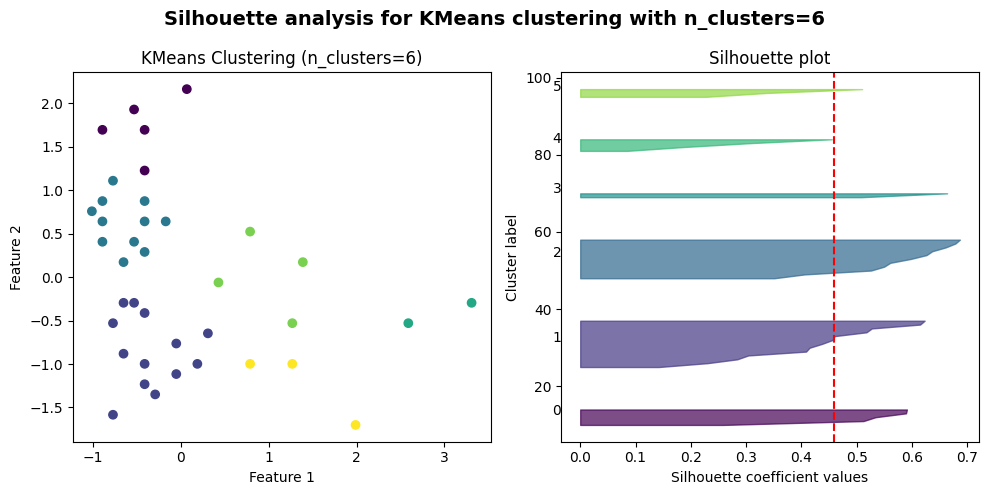

For n_clusters=7, the average silhouette score is: 0.4399682152976906


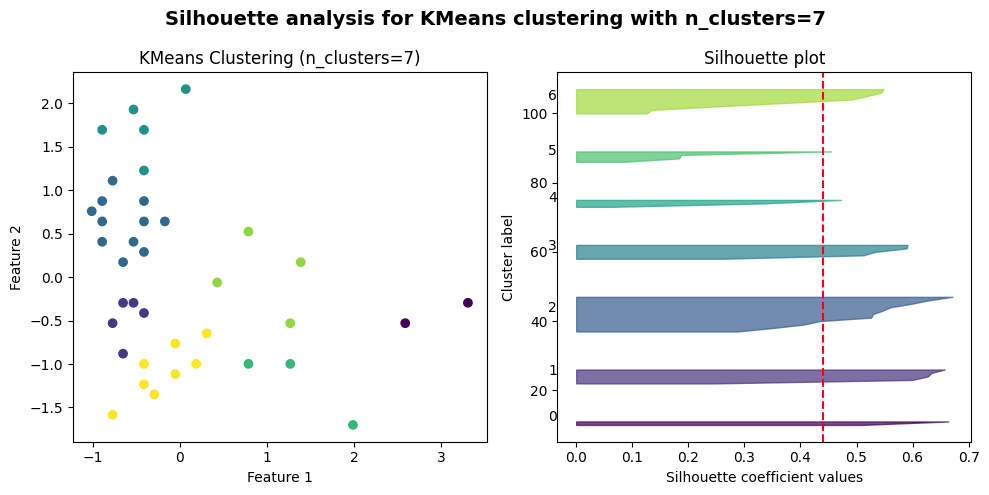

For n_clusters=8, the average silhouette score is: 0.43519279323501897


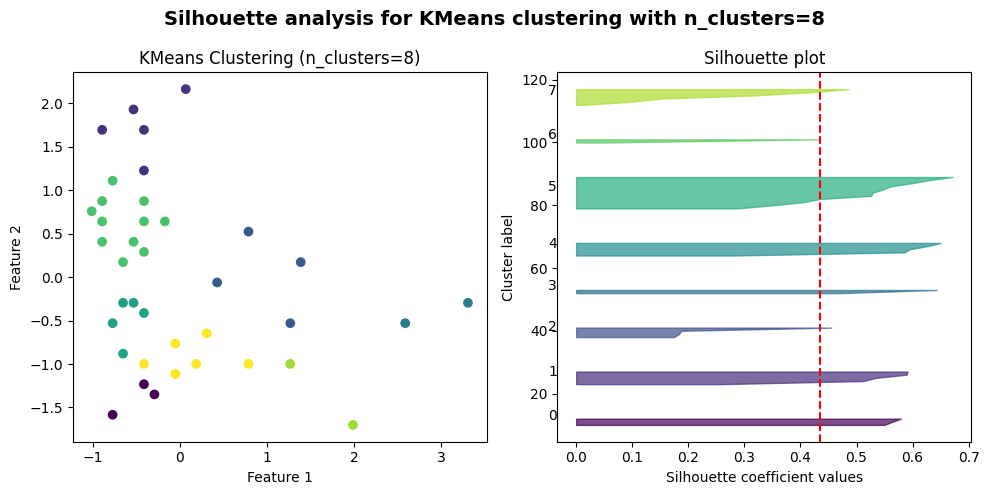

For n_clusters=9, the average silhouette score is: 0.42209388731271735


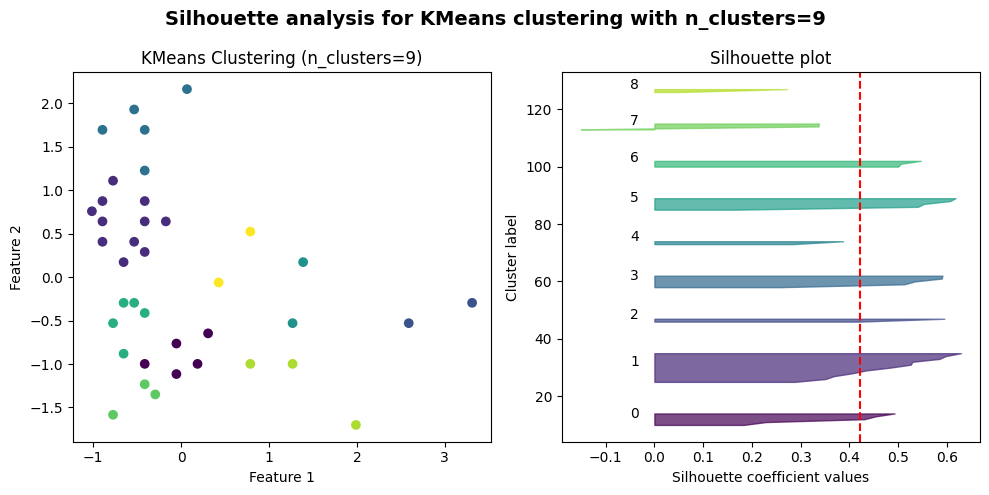

For n_clusters=10, the average silhouette score is: 0.33983275235232546


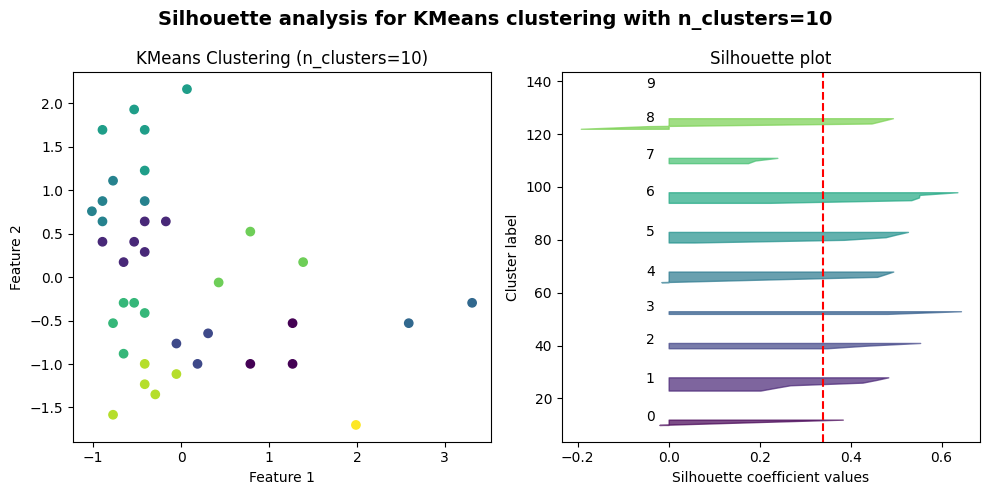

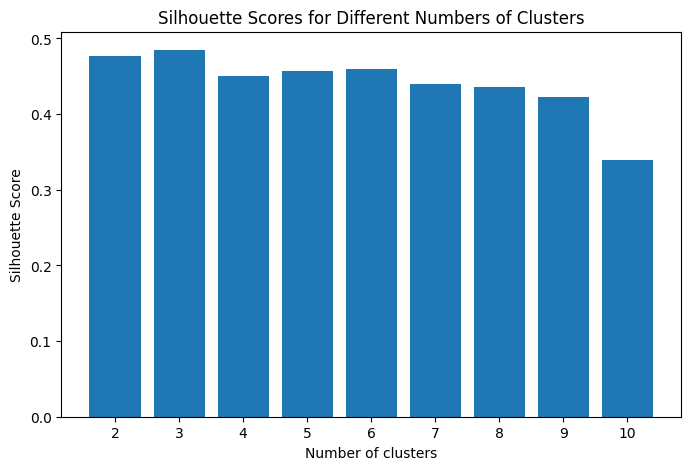

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming df_rfm_normalized is your DataFrame with normalized data
# Replace this with your actual data
df_rfm_normalized = df_RFM_normalized

# Range of clusters to evaluate
range_n_clusters = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_rfm_normalized)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_rfm_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute silhouette samples
    sample_silhouette_values = silhouette_samples(df_rfm_normalized, cluster_labels)

    # Create subplot for silhouette plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(df_rfm_normalized.iloc[:, 0], df_rfm_normalized.iloc[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f"KMeans Clustering (n_clusters={n_clusters})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Create subplot for silhouette coefficients
    plt.subplot(1, 2, 2)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color='red', linestyle='--')
    plt.title("Silhouette plot")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters={n_clusters}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.bar(range_n_clusters, silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xticks(range_n_clusters)
plt.show()


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming df_rfm_normalized is your DataFrame with normalized data
# Replace this with your actual data
df_rfm_normalized = df_RFM_normalized

# Range of clusters to evaluate
range_n_clusters = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_rfm_normalized)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_rfm_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette score is: {silhouette_avg}")

# Find the optimal k with highest silhouette score
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (k) based on silhouette score is: {optimal_k}")


For n_clusters=2, the average silhouette score is: 0.4771154449227562
For n_clusters=3, the average silhouette score is: 0.48460049514121334
For n_clusters=4, the average silhouette score is: 0.45050982654031557
For n_clusters=5, the average silhouette score is: 0.4567388876045491
For n_clusters=6, the average silhouette score is: 0.4595425253806999
For n_clusters=7, the average silhouette score is: 0.4399682152976906
For n_clusters=8, the average silhouette score is: 0.43519279323501897
For n_clusters=9, the average silhouette score is: 0.42209388731271735
For n_clusters=10, the average silhouette score is: 0.33983275235232546
The optimal number of clusters (k) based on silhouette score is: 3


In [61]:
from sklearn.cluster import KMeans
n_clusters=3
model = KMeans(n_clusters=n_clusters, random_state=12, n_init=10)
model.fit(df_RFM_normalized)

kmeans = df_RFM_normalized.copy()
kmeans['Segmen'] = (model.labels_+1)
kmeans

,Recency,Frequency,Monetary,Segmen
id_customer,,,,
wsh001,-0.534444,1.928977,2.271838,2
wsh002,-0.894956,0.640938,0.487359,2
wsh003,-0.414273,0.289655,0.619683,2
wsh004,0.066410,2.163166,1.625342,2
wsh005,0.787435,0.523844,0.709474,2
wsh006,3.311021,-0.295818,-0.300912,1
wsh007,-0.414273,0.640938,0.631970,2
wsh008,-0.894956,1.694789,1.661259,2
wsh009,-0.414273,0.875127,1.020434,2


In [48]:
kmeans.groupby('Segmen').agg({'Segmen': 'count'})

,Segmen
Segmen,
1,15
2,17
3,6


In [ ]:
def func(row):
    if row['Segmen'] == 3:
        return 'Old Customer'
    elif row['Segmen'] == 2:
         return 'Loyal Customer'
    elif row['Segmen'] == 1:
        return 'Active Customer'
    else:
        return 'New Customer'


kmeans['Segmen'] = kmeans.apply(func, axis=1)

kmeans

,Recency,Frequency,Monetary,Segmen
id_customer,,,,
wsh001,-0.534444,1.928977,2.271838,Loyal Customer
wsh002,-0.894956,0.640938,0.487359,Loyal Customer
wsh003,-0.414273,0.289655,0.619683,Loyal Customer
wsh004,0.066410,2.163166,1.625342,Loyal Customer
wsh005,0.787435,0.523844,0.709474,Loyal Customer
wsh006,3.311021,-0.295818,-0.300912,Old Customer
wsh007,-0.414273,0.640938,0.631970,Loyal Customer
wsh008,-0.894956,1.694789,1.661259,Loyal Customer
wsh009,-0.414273,0.875127,1.020434,Loyal Customer
